# <font color=green size=10>2º Projeto Prático - Dados</font>
***



# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://raw.githubusercontent.com/GitdoPedro/2-Projeto-Pratico-Dados/main/modelagem_regressao_linear/alugueis_zona_sul.csv

### Descrição:
Com 2885 registros na base de dados sobre os imóveis de São Paulo, a Zona sul é a que se destaca em quantidade. Neste sentido, foi escolhida pra análise de modelagem de regressão linear.
.

### Dados:
- **area** - Tamanho do imóvel (m²)
- **rent** - Valor do Aluguel (R$)


---

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

### Importe o dataset

In [6]:
dataset =  pd.read_csv('/content/alugueis_zona_sul.csv', sep = ';')
dataset = dataset[['rent', 'area']].rename(columns={'rent': 'Y', 'area': 'X'})
dataset

,address,district,area,bedrooms,garage,type,rent,total,cep,Zona
0,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,3500,5187,04561-000,Sul
1,Rua Guaraiuva,Cidade Monções,30,1,1,Casa,2394,2538,04857-701,Sul
2,Rua Fernando de Noronha,Chácara Inglesa,62,2,1,Apartamento,2700,3754,04141-050,Sul
3,Avenida dos Ourives,Jardim São Savério,63,3,1,Apartamento,1460,2018,04194-260,Sul
4,Rua Dom Macário,Saúde,54,2,0,Apartamento,1100,1462,04292-040,Sul
...,...,...,...,...,...,...,...,...,...,...
2880,Rua Vespasiano de Oliveira,Vila Elvira,235,4,3,Casa em condomínio,9500,10880,04725-040,Sul
2881,São José,Alto da Boa Vista,158,4,2,Apartamento,6500,8929,04739-000,Sul
2882,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778,04733-000,Sul
2883,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467,04729-030,Sul


### Visualize o conteúdo do DataFrame

In [12]:
dataset.shape

(2885, 2)

In [13]:
dataset.head()

,Y,X
0,3500,72
1,2394,30
2,2700,62
3,1460,63
4,1100,54


### Obtenha e avalie as estatísticas descritivas dos dados

In [14]:
dataset.describe()

,Y,X
count,2885.000000,2885.000000
mean,3943.374003,94.612132
std,2959.033111,79.616563
min,500.000000,11.000000
25%,2000.000000,45.000000
50%,3100.000000,68.000000
75%,4650.000000,116.000000
max,25000.000000,570.000000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<Axes: title={'center': 'Box plot'}, xlabel='Preço do aluguel (R$)'>

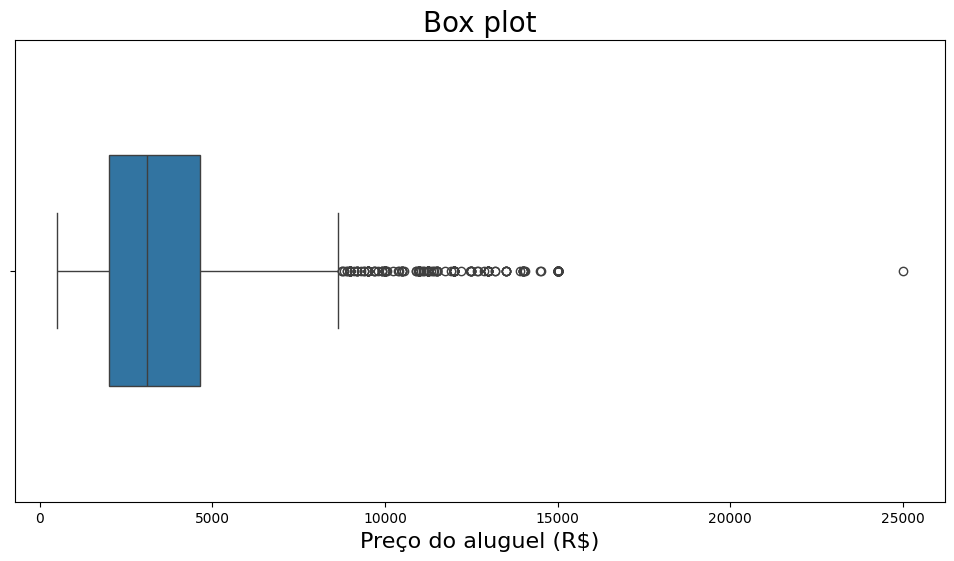

In [19]:
ax = sns.boxplot(data=dataset, x  = 'Y', orient = 'h', width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Box plot', fontsize = 20)
ax.set_xlabel('Preço do aluguel (R$)', fontsize = 16)
ax

<Axes: title={'center': 'Box plot'}, xlabel='Área do imóvel (m²)'>

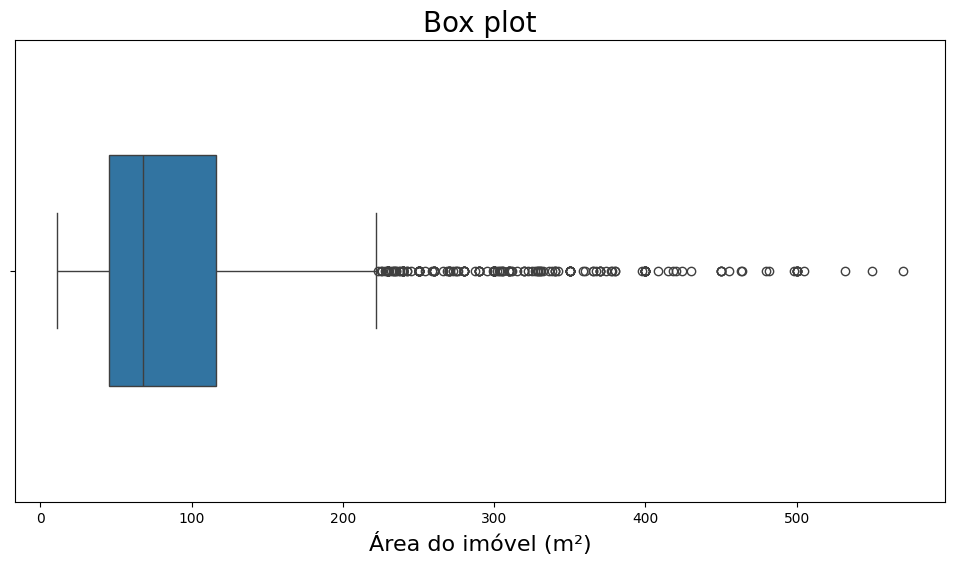

In [22]:
ax = sns.boxplot(data=dataset, x  = 'X', orient = 'h', width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Box plot', fontsize = 20)
ax.set_xlabel('Área do imóvel (m²)', fontsize = 16)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

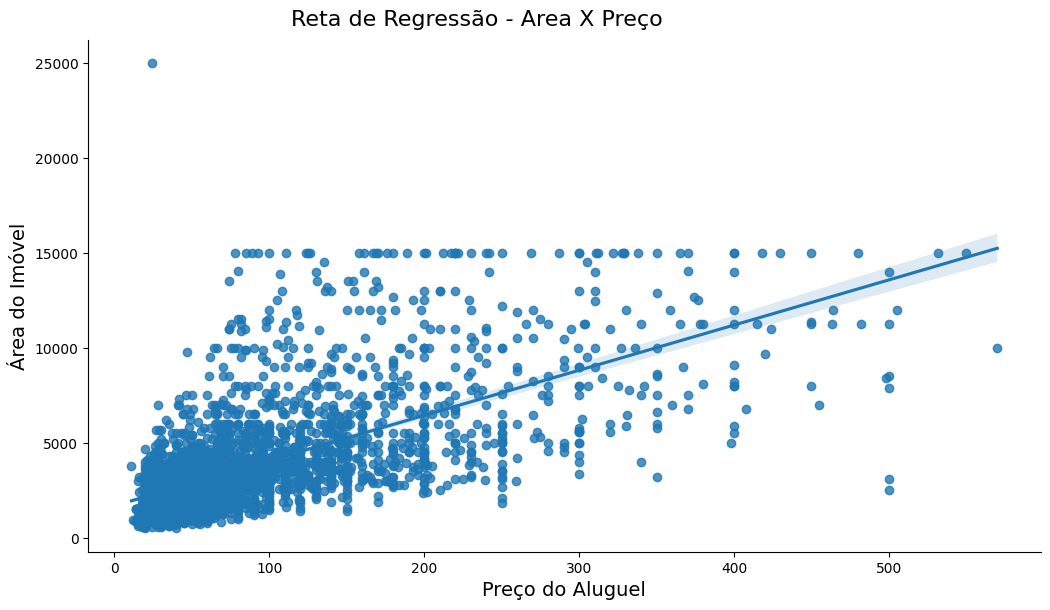

In [23]:
ax = sns.lmplot( x = "X", y = "Y" , data=dataset)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regressão - Area X Preço' , fontsize = 16 , y=1.02)
ax.set_xlabels("Preço do Aluguel", fontsize = 14)
ax.set_ylabels("Área do Imóvel", fontsize = 14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [24]:
dataset.corr()

,Y,X
Y,1.00000,0.63965
X,0.63965,1.00000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim.

É possível quantificar a intensidade dessa relação?

Resp.: Sim. A partir do coeficiente de correlação.

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não.

### Prepare os dados para estimar um modelo de regressão linear simples

In [25]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

### Estime o modelo de regressão linear simples

In [26]:
resultado_regressao = sm.OLS(Y,X).fit()

### Visualize o resultado da regressão

In [27]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     1996.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:06:51   Log-Likelihood:                -26393.
No. Observations:                2885   AIC:                         5.279e+04
Df Residuals:                    2883   BIC:                         5.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1694.1335     65.787     25.752      0.0

### Obtenha o $Y$ previsto

In [28]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset.head()

,Y,X,Y_previsto
0,3500,72,3405.809512
1,2394,30,2407.331839
2,2700,62,3168.076732
3,1460,63,3191.850010
4,1100,54,2977.890509


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o valor do aluguel para uma área de 120m²?

In [61]:
resultado_regressao.predict([1,150])[0]

5260.125189799037

### Obtenha os resíduos da regressão

In [32]:
dataset['Residuos'] = resultado_regressao.resid
dataset.head()

,Y,X,Y_previsto,Residuos
0,3500,72,3405.809512,94.190488
1,2394,30,2407.331839,-13.331839
2,2700,62,3168.076732,-468.076732
3,1460,63,3191.850010,-1731.850010
4,1100,54,2977.890509,-1877.890509


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<Axes: title={'center': 'Redíduos vs Y_Previsto'}, xlabel='Y_previsto', ylabel='Resíduos'>

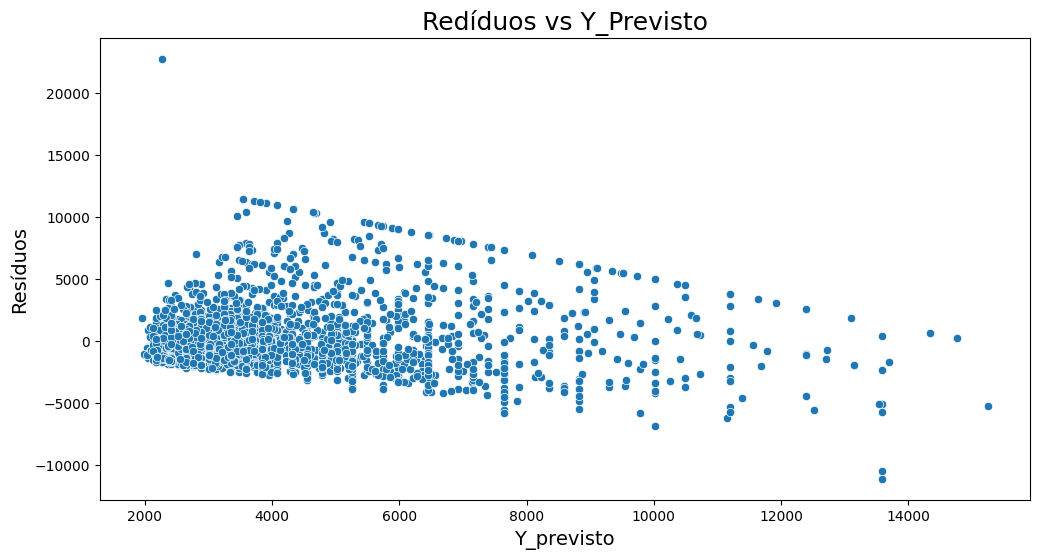

In [34]:
ax = sns.scatterplot( x = dataset.Y_previsto, y = dataset.Residuos)
ax.figure.set_size_inches(12,6)
ax.set_title('Redíduos vs Y_Previsto', fontsize = 18)
ax.set_xlabel('Y_previsto', fontsize = 14)
ax.set_ylabel('Resíduos', fontsize = 14)
ax

### Obtenha o QQPlot dos resíduos

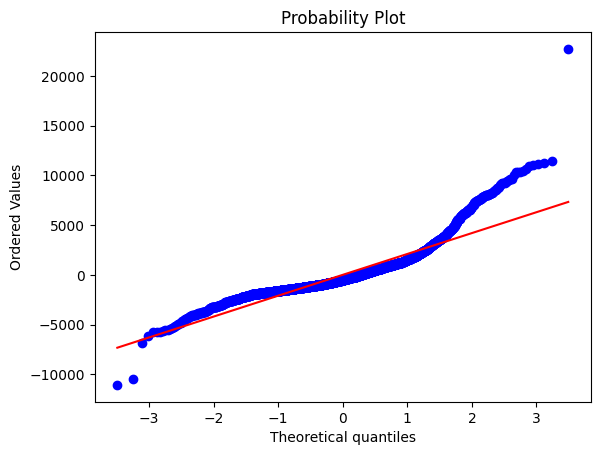

In [45]:
(_,(_, _, _)) = probplot(dataset.Residuos, plot = plt)
plt.show()

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [46]:
SQE = resultado_regressao.ssr
SQE

14920047911.713135

In [47]:
SQR = resultado_regressao.ess
SQR

10331901211.73713

In [48]:
SQT = SQR + SQE
SQT

25251949123.450264

In [49]:
R2 = SQR / SQT
R2

0.40915262268378294

In [50]:
resultado_regressao.rsquared

0.40915262268378294